In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import time

Used AI to import the data from kaggle using API

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harrimansaragih/dummy-advertising-and-sales-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'dummy-advertising-and-sales-data' dataset.
Path to dataset files: /kaggle/input/dummy-advertising-and-sales-data


In [ ]:
import os
import pandas as pd

print(f"Contents of the downloaded directory '{path}':")
print(os.listdir(path))

file_path = os.path.join(path, 'Dummy Data HSS.csv')

# Once you have the correct file_path, uncomment the following lines:
df = pd.read_csv(file_path)
print(df.head())

Contents of the downloaded directory '/kaggle/input/dummy-advertising-and-sales-data':
['Dummy Data HSS.csv']
     TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181


Normalized the data on the using the formula x = (x-min(x))/(max(x)-min(x))

In [ ]:
df['Radio'] = (df['Radio']-df['Radio'].min())/(df['Radio'].max()-df['Radio'].min())
df['TV'] = (df['TV']-df['TV'].min())/(df['TV'].max()-df['TV'].min())
df['Social Media'] = (df['Social Media']-df['Social Media'].min())/(df['Social Media'].max()-df['Social Media'].min())
ymax, ymin = df['Sales'].max(), df['Sales'].min()
df['Sales'] = (df['Sales']-ymin)/(ymax-ymin)

In [ ]:
#Split the data into train data and test data to test the model
data = df[:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [ ]:
A, B, C, D = 0.0, 0.0, 0.0, 0.0

In [ ]:
#shuffled the data
data = data.sample(frac=1).reset_index(drop=True)

In [ ]:
#Assumed that the type of influencer does not impact the sales of the company
epoches = 10000
lr = 0.1
loss = []
for epoch in tqdm(range(epoches), desc="Training Progress"):
  time.sleep(0.01)
  for i in range(0, len(data), 32):
    batch = data.iloc[i:i+32]
    tv = batch['TV']
    radio = batch['Radio']
    social = batch['Social Media']
    y = batch['Sales']
    y_pred = A*tv + B*radio + C*social + D
    error = y_pred - y
    loss.append(((error**2).sum())/64)
    gradA = (error*tv).sum()/32
    gradB = (error*radio).sum()/32
    gradC = (error*social).sum()/32
    gradD = error.sum()/32

    A = A - (lr*gradA)
    B = B - (lr*gradB)
    C = C - (lr*gradC)
    D = D - (lr*gradD)
    lr = lr*0.99999

Training Progress: 100%|██████████| 10000/10000 [20:02<00:00,  8.32it/s]


In [ ]:
print(A, B, C, D)

0.9634444157297086 -0.0007343203560262465 0.000791614516404365 0.012683784287475162


In [ ]:
test.head()

,TV,Radio,Social Media,Influencer,Sales
3200,0.933333,0.554303,0.133598,Nano,0.917592
3201,0.977778,0.584314,0.386778,Nano,0.946245
3202,0.144444,0.089525,0.235968,Nano,0.150905
3203,0.155556,0.228956,0.023596,Nano,0.157082
3204,0.177778,0.303174,0.424130,Mega,0.191771


In [ ]:
test['Sales Pred'] = A*test['TV'] + B*test['Radio'] + C*test['Social Media'] + D
test.head()

/tmp/ipython-input-765398817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sales Pred'] = A*test['TV'] + B*test['Radio'] + C*test['Social Media'] + D


,TV,Radio,Social Media,Influencer,Sales,Sales Pred
3200,0.933333,0.554303,0.133598,Nano,0.917592,0.911597
3201,0.977778,0.584314,0.386778,Nano,0.946245,0.954595
3202,0.144444,0.089525,0.235968,Nano,0.150905,0.151969
3203,0.155556,0.228956,0.023596,Nano,0.157082,0.162403
3204,0.177778,0.303174,0.424130,Mega,0.191771,0.184076


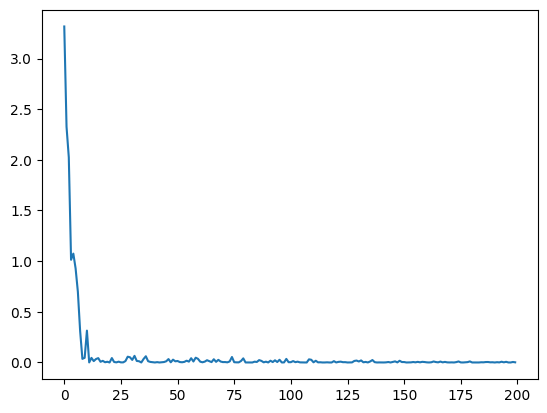

In [ ]:
#graph of loss function vs epoch for mini batch gradient descent
import matplotlib.pyplot as plt
plt.plot(loss[:200])

In [ ]:
#Scaled back values up to calculate Mean Square Error
test['Sales'] = test['Sales']*(ymax-ymin) + ymin
test['Sales Pred'] = test['Sales Pred']*(ymax-ymin) + ymin
test.head()

/tmp/ipython-input-215322165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sales'] = test['Sales']*(ymax-ymin) + ymin
/tmp/ipython-input-215322165.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sales Pred'] = test['Sales Pred']*(ymax-ymin) + ymin


,TV,Radio,Social Media,Influencer,Sales,Sales Pred
3200,0.933333,0.554303,0.133598,Nano,336.647627,334.652229
3201,0.977778,0.584314,0.386778,Nano,346.185845,348.965463
3202,0.144444,0.089525,0.235968,Nano,81.432659,81.786913
3203,0.155556,0.228956,0.023596,Nano,83.489053,85.260330
3204,0.177778,0.303174,0.424130,Mega,95.036069,92.474661


In [ ]:
mse = (((test['Sales']-test['Sales Pred']).sum())**2)/len(test)
print(mse)

0.16995485636291785


In [ ]:
yavg = test['Sales'].mean()
ssres = ((test['Sales']-test['Sales Pred'])**2).sum()
ss = ((test['Sales']-yavg)**2).sum()
r2 = 1 - (ssres/ss)
print(f"R2 Score: {r2}")

R2 Score: 0.9989656175479288
